In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
clinical_HDP_all = pd.read_csv('/mnt/data/2020_Projects/2021_HDP/03_Data/FBCcalc_simbio_fastfield_20subj/clinical_mA_effect.csv')
clinical_CST_all = pd.read_csv('/mnt/data/2020_Projects/2021_HDP/03_Data/FBCcalc_simbio_fastfield_20subj/clinical_mA_side_effect_capsular.csv')
# clinical_mA_side_effect_capsular.csv contains nan in 'mA_capsular' for those contacts that result in non-capsular side effects
clinical_CST_all = clinical_CST_all.dropna()
clinical_CST_all.drop('mA', axis=1, inplace=True)

In [3]:
clinical_HDP_all['subject'] = pd.DataFrame(clinical_HDP_all.ContactID.str.split('_').str[0])
clinical_HDP_all['contact'] = pd.DataFrame(clinical_HDP_all.ContactID.str.split('_').str[1])
clinical_HDP_all['lead'] = pd.DataFrame(clinical_HDP_all.LeadID.str.split('_').str[1])
clinical_HDP_all['Threshold'] = 'Effect'

clinical_CST_all['subject'] = pd.DataFrame(clinical_CST_all.ContactID.str.split('_').str[0])
clinical_CST_all['contact'] = pd.DataFrame(clinical_CST_all.ContactID.str.split('_').str[1])
clinical_CST_all['lead'] = pd.DataFrame(clinical_CST_all.LeadID.str.split('_').str[1])
clinical_CST_all['Threshold'] = 'Side effect'

#Select DaHa data for plot
clinical_HDP = clinical_HDP_all.loc[clinical_HDP_all.subject == 'DaHa']
clinical_CST = clinical_CST_all.loc[clinical_CST_all.subject == 'DaHa']

In [4]:
clinical_CST.rename(columns={'mA_capsular': 'mA'}, inplace=True)

data = pd.concat([clinical_HDP[['contact', 'lead', 'mA', 'Threshold']], clinical_CST[['contact', 'lead', 'mA', 'Threshold']]], axis=0)

/tmp/ipykernel_8488/1408591941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clinical_CST.rename(columns={'mA_capsular': 'mA'}, inplace=True)


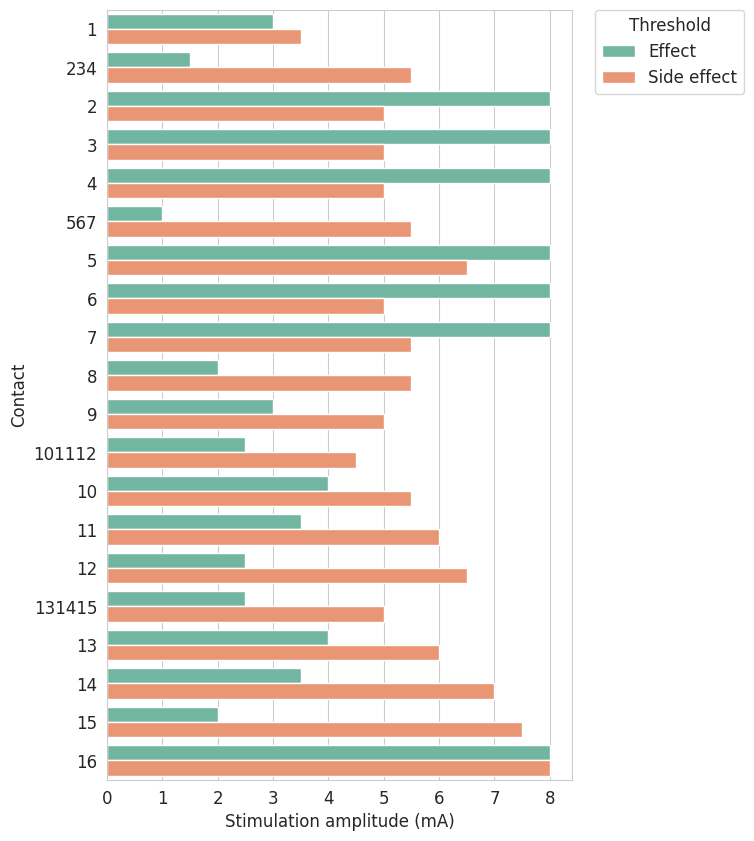

In [5]:
plt.figure(figsize=(6, 10))
plt.rc('font', size=12)

ax = sns.barplot(x="mA", y="contact", data=data, hue='Threshold', palette='Set2')

plt.xlabel('Stimulation amplitude (mA)')
plt.ylabel('Contact')

plt.legend(title='Threshold', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [6]:
# rename contacts
dict = {
    '1': '1',
    '2': '2',
    '3': '3',
    '4': '4',
    '234': '234',
    '5': '5',
    '6': '6',
    '7': '7',
    '567': '567',
    '8': '8',
    '9': '1',
    '10': '2',
    '11': '3',
    '12': '4',
    '101112': '234',
    '13': '5',
    '14': '6',
    '15': '7',
    '131415': '567',
    '16': '8'
}

# create 'contact' & 'level' columns in clinical_mA

data['C'] = data['contact'].map(dict)

In [7]:
data_R = pd.DataFrame(data[data['lead'] == 'R'])
data_L = pd.DataFrame(data[data['lead'] == 'L'])

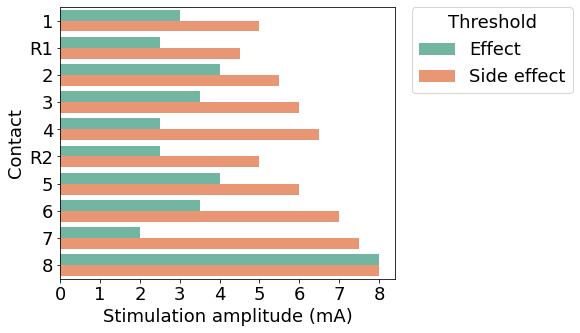

In [14]:
# Right lead
plt.figure(figsize=(6, 5))
plt.rc('font', size=18)

sns.barplot(x="mA", y="C", data=data_R, hue='Threshold', palette='Set2')

xticks = np.arange(0,9,1)
plt.xticks(xticks)

yticks = np.arange(0,10, 1)
#plt.yticks(yticks, ('c1','r1','c2', 'c3', 'c4','r2','c5','c6','c7','c8'))
plt.yticks(yticks, ('1','R1','2', '3', '4','R2','5','6','7','8'))

plt.xlabel('Stimulation amplitude (mA)')
plt.ylabel('Contact')
#plt.title('Right lead')
plt.legend(title='Threshold', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.savefig('/mnt/data/2020_Projects/2021_HDP/03_Data/Plots/methods_right_C_v3.png', dpi=300, bbox_inches='tight')

In [ ]:
# Left lead
plt.figure(figsize=(6, 5))
plt.rc('font', size=18)

sns.barplot(x="mA", y="C", data=data_L, hue='Threshold', palette='Set2')

xticks = np.arange(0,9,1)
plt.xticks(xticks)

plt.xlabel('Stimulation amplitude (mA)')
plt.ylabel('Contact')
plt.title('Left lead')
plt.legend(title='Threshold', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.savefig('/mnt/data/2020_Projects/2021_HDP/03_Data/Plots/methods_left_C.png', dpi=300, bbox_inches='tight')